In [2]:
import pandas as pd
import numpy as np
import re
#import nltk
#from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
import seaborn as sns
import operator
import matplotlib.pyplot as plt
#nltk.download('stopwords')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from kmodes.kmodes import KModes
from collections import Counter
import pickle
%matplotlib inline

In [3]:
dataset = pd.read_csv('data_30726034.csv', encoding = "ISO-8859-1")

#Getting dummies for servico and id_conta
#servico = dataset['servico'].astype(str)
#servico_dummies = pd.get_dummies(servico)
#id_conta = dataset['id_conta'].astype(str)
#id_conta_dummies = pd.get_dummies(id_conta)
#concatenating both
#X = pd.concat([servico_dummies, id_conta_dummies], axis=1)

#Using Kmodes, it is not necessary to transform categorical data into dummies, the algorithm does it for you
X = pd.concat([dataset['servico'].astype(str),dataset['id_conta'].astype(str)],axis=1)

In [4]:
X.head()

,servico,id_conta
0,30726034,1135485394
1,30726034,1135485394
2,30726034,1135485394
3,30726034,1135485394
4,30726034,1135485394


In [ ]:
# Reducing dimentionality, not sure if it is necessary

X_reduced = PCA(n_components = 2, random_state = 42).fit_transform(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 18184.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 18184.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 18184.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 18184.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 18184.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 51, cost: 18062.0
Run 1, iteration: 2/100, moves: 0, cost: 18062.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9, cost: 17794.0
Run 2, iteration: 2/100, 

Run 2, iteration: 1/100, moves: 252, cost: 13501.0
Run 2, iteration: 2/100, moves: 0, cost: 13501.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1042, cost: 14098.0
Run 3, iteration: 2/100, moves: 0, cost: 14098.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 139, cost: 14982.0
Run 4, iteration: 2/100, moves: 0, cost: 14982.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1104, cost: 13848.0
Run 5, iteration: 2/100, moves: 1, cost: 13848.0
Best run was number 2


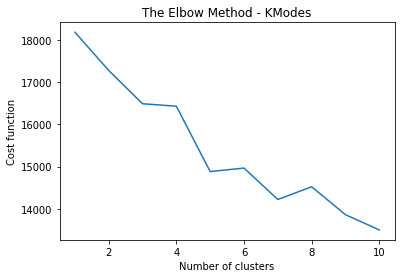

In [6]:
# Using Elbow Method to find the right number of clusters

cost = []
for i in range(1,11):
    kmod = KModes(n_clusters=i, init='Huang', n_init=5, verbose=1)
    kmod.fit(X)
    cost.append(kmod.cost_)
    
plt.plot(range(1,11), cost)    
plt.title('The Elbow Method - KModes')
plt.xlabel('Number of clusters')
plt.ylabel('Cost function')
plt.show()


In [14]:
# Fitting KModes to the data

kmod = KModes(n_clusters = 7, init = 'Huang', n_init=5, verbose=1)
y_kmod = kmod.fit_predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 471, cost: 15725.0
Run 1, iteration: 2/100, moves: 0, cost: 15725.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 122, cost: 14909.0
Run 2, iteration: 2/100, moves: 0, cost: 14909.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 115, cost: 15512.0
Run 3, iteration: 2/100, moves: 0, cost: 15512.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 54, cost: 15706.0
Run 4, iteration: 2/100, moves: 0, cost: 15706.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 74, cost: 15625.0
Run 5, iteration: 2/100, moves: 0, cost: 15625.0
Best run was number 2


In [15]:
# Adding cluster column to the dataframe

dataset_clusters = pd.concat([X, pd.DataFrame(data = y_kmod)], axis=1)
dataset_clusters = dataset_clusters.rename(columns={0:'cluster'})

In [16]:
dataset_clusters.head()

,servico,id_conta,cluster
0,30726034,1135485394,0
1,30726034,1135485394,0
2,30726034,1135485394,0
3,30726034,1135485394,0
4,30726034,1135485394,0


In [17]:
# Separating clusters by its label adn getting the TUSS

cluster0 = dataset_clusters[dataset_clusters['cluster'] == 0]['servico']
cluster1 = dataset_clusters[dataset_clusters['cluster'] == 1]['servico']
cluster2 = dataset_clusters[dataset_clusters['cluster'] == 2]['servico']
cluster3 = dataset_clusters[dataset_clusters['cluster'] == 3]['servico']
cluster4 = dataset_clusters[dataset_clusters['cluster'] == 4]['servico']
cluster5 = dataset_clusters[dataset_clusters['cluster'] == 5]['servico']
cluster6 = dataset_clusters[dataset_clusters['cluster'] == 6]['servico']



count_cluster0 = dict(Counter(cluster0)) 
count_cluster1 = dict(Counter(cluster1)) 
count_cluster2 = dict(Counter(cluster2)) 
count_cluster3 = dict(Counter(cluster3)) 
count_cluster4 = dict(Counter(cluster4)) 
count_cluster5 = dict(Counter(cluster5)) 
count_cluster6 = dict(Counter(cluster6)) 

In [21]:
# The commented clusters don't have any incidences of the master TUSS

print('Cluster 0: {} incidendias do TUSS mestre (30726034)'.format(count_cluster0['30726034']))
#print('Cluster 1: {} incidendias do TUSS mestre (30726034)'.format(count_cluster1['30726034']))
#print('Cluster 2: {} incidendias do TUSS mestre (30726034)'.format(count_cluster2['30726034']))
print('Cluster 3: {} incidendias do TUSS mestre (30726034)'.format(count_cluster3['30726034']))
print('Cluster 4: {} incidendias do TUSS mestre (30726034)'.format(count_cluster4['30726034']))
print('Cluster 5: {} incidendias do TUSS mestre (30726034)'.format(count_cluster5['30726034']))
#print('Cluster 6: {} incidendias do TUSS mestre (30726034)'.format(count_cluster6['30726034']))



Cluster 0: 376 incidendias do TUSS mestre (30726034)
Cluster 3: 9 incidendias do TUSS mestre (30726034)
Cluster 4: 25 incidendias do TUSS mestre (30726034)
Cluster 5: 16 incidendias do TUSS mestre (30726034)


In [13]:
print(count_cluster0)

{'40311210': 4, '41578': 5, '90137043': 1, '9261881': 1, '70360812': 10, '32460': 3, '3245021': 3, '40304337': 10, '84008': 5, '29514': 3, '90045777': 3, '90208501': 3, '159589': 6, '41577': 5, '3950585': 3, '20103441': 40, '88340': 3, '767369': 3, '7380134': 1, '100276': 10, '114600': 1, '90075110': 1, '70361045': 1, '90047109': 3, '40310604': 5, '1287': 5, '49562': 3, '15791': 5, '37756': 1, '167323': 2, '144856': 1, '239558': 5, '60033606': 1, '5002199': 1, '79711': 5, '138247': 1, '144860': 3, '173504': 3, '143357': 3, '60017066': 1, '60027452': 5, '90015541': 6, '80053904': 1, '8914324': 1, '8265217': 1, '770041': 6, '90094727': 12, '28774': 5, '20103069': 20, '28864': 8, '96319': 4, '8260821': 1, '70034729': 3, '40301150': 1, '9040876': 1, '137312': 3, '10008': 3, '49056': 3, '70014370': 50, '162111': 5, '5014210': 1, '70014302': 10, '70204233': 2, '252026': 1, '60025492': 6, '175099': 3, '90047206': 10, '70139040': 6, '70714509': 1, '241437': 1, '90008332': 37, '60027541': 1, '9